In [46]:
## Grover Algorithm: From Qiskit Documentation

In [21]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [22]:
def phase_oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)

In [23]:
def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    
    for q in range(nqubits):
        circuit.x(q)
        circuit.h(q)

In [24]:
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit)

grover_circuit.measure_all()

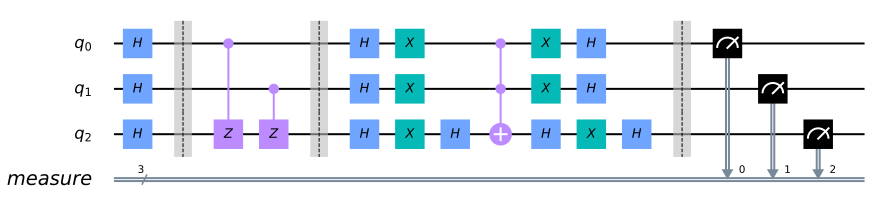

In [25]:
grover_circuit.draw(output="mpl")

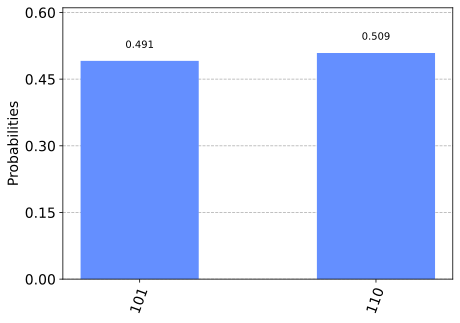

In [26]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [ ]:
## Alternative version of Grover Algorithm with S gate

In [54]:
n = 3
q = QuantumRegister(n)
c = ClassicalRegister(n)
grover_circuit3 = QuantumCircuit(q,c)

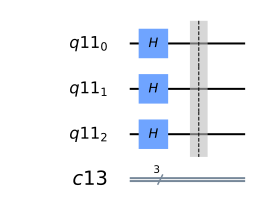

In [55]:
for qubit in range(n):
    grover_circuit3.h(qubit)
grover_circuit3.barrier()
grover_circuit3.draw('mpl')

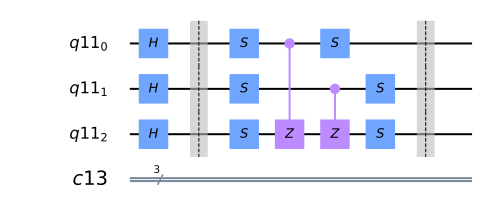

In [56]:
for i in range(n):
    grover_circuit3.s(q[i])
grover_circuit3.cz(q[0], q[2])
grover_circuit3.cz(q[1], q[2])
for i in range(n):
    grover_circuit3.s(q[i])
grover_circuit3.barrier()
grover_circuit3.draw('mpl')

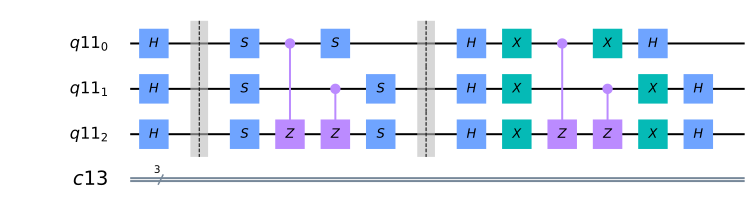

In [57]:
for i in range(n):
    grover_circuit3.h(q[i])

for i in range(n):
    grover_circuit3.x(q[i])

grover_circuit3.cz(q[0], q[2])
grover_circuit3.cz(q[1], q[2])

for i in range(n):
    grover_circuit3.x(q[i])

for i in range(n):
    grover_circuit3.h(q[i])
grover_circuit3.draw('mpl')

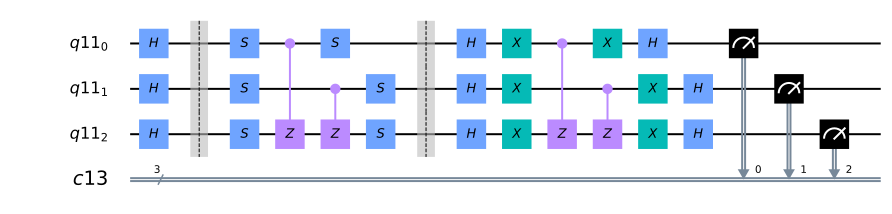

In [58]:
grover_circuit3.measure(q, c)
grover_circuit3.draw('mpl')

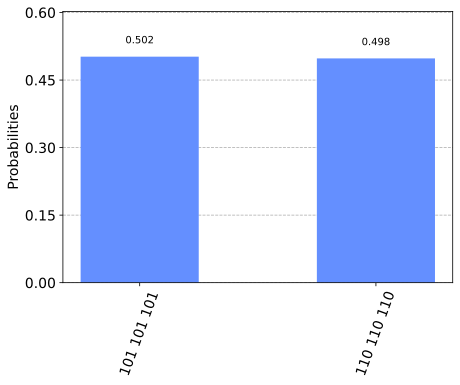

In [59]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, backend_sim)
statevec = job_sim.result().get_statevector()
grover_circuit.measure_all()
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)